In [2]:

# Import libraries and packages


# import PyPi package for cohort libraries using shortcut
#!pip install -U fsds_100719 # comment out after install so it won't run again
# Import packages
import fsds_100719 as fs
from fsds_100719.imports import *


#inline_rc = dict(mpl.rcParams)
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
#!pip install uszipcode




#ignore pink warnings
import warnings
warnings.filterwarnings('ignore')


# Allow for large # columns
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows','')









fsds_1007219  v0.4.45 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [ ]:
# Create keywords for .set_xticklabels()
tick_kwds = dict(horizontalalignment='right', 
                  fontweight='light', 
                  fontsize='x-large',   
                  rotation=45)

ax.set_xticklabels(ax.get_xticklabels(),**tick_kwds)

In [3]:

#Grouped Bar plots with sem 
N = 5
menMeans = (150*cm, 160*cm, 146*cm, 172*cm, 155*cm)
menStd = (20*cm, 30*cm, 32*cm, 10*cm, 20*cm)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, bottom=0*cm, yerr=menStd)


womenMeans = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
womenStd = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
p2 = ax.bar(ind + width, womenMeans, width, bottom=0*cm, yerr=womenStd)

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((p1[0], p2[0]), ('Men', 'Women'))
ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

NameError: name 'cm' is not defined

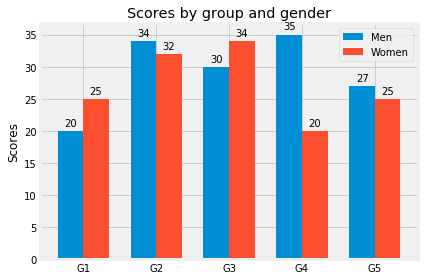

In [4]:
# grouped bar plot with sem and Value Labels above bars



labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

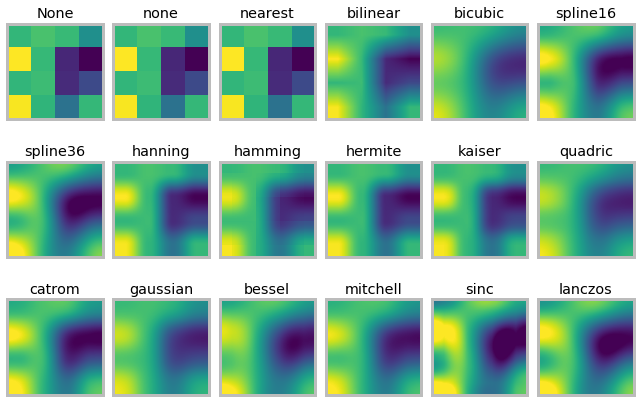

In [10]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

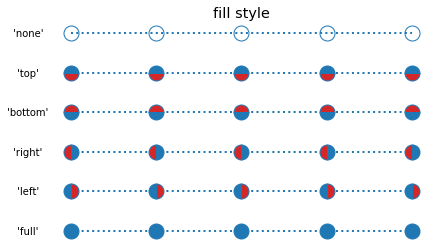

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(5)  # Draw 5 points for each line
marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=15, markerfacecoloralt='tab:red')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style),
            horizontalalignment='center', verticalalignment='center')
    ax.plot(y * points, fillstyle=fill_style, **marker_style)

ax.set_axis_off()
ax.set_title('fill style')

plt.show()

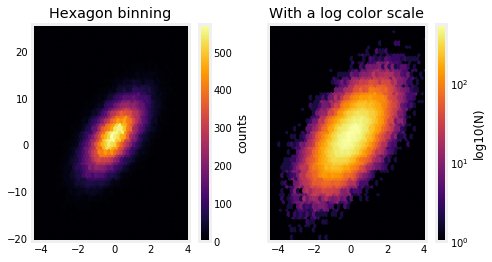

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

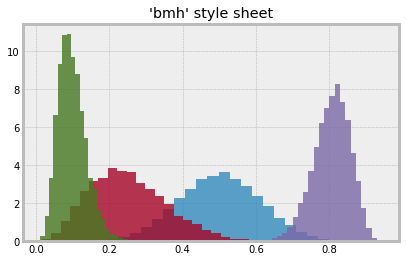

In [7]:
from numpy.random import beta
import matplotlib.pyplot as plt


plt.style.use('bmh')


def plot_beta_hist(ax, a, b):
    ax.hist(beta(a, b, size=10000), histtype="stepfilled",
            bins=25, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

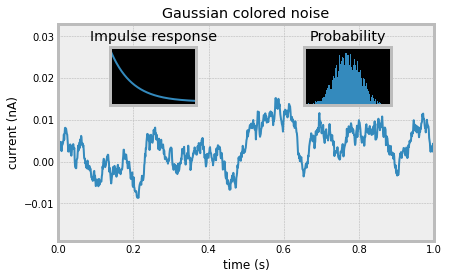

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set_title('Probability')
right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set_title('Impulse response')
left_inset_ax.set_xlim(0, 0.2)
left_inset_ax.set_xticks([])
left_inset_ax.set_yticks([])

plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.

with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

In [ ]:


# pypi package for retrieving information based on us zipcodes
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database

# create array of zipcodes
zipcodes = df['zipcode'].unique()
zipcodes
array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])
# create empty dictionary 
dzip = {}

# search pypi uszipcode library to retreive data for each zipcode
for c in zipcodes:
    z = search.by_zipcode(c)
    dzip[c] = z.to_dict()
    
dzip.keys()
dict_keys([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039])
# check information for one of the zipcodes 
# 98032 had the worst p-value (0.838)
dzip[98032]
{'zipcode': '98032',
 'zipcode_type': 'Standard',
 'major_city': 'Kent',
 'post_office_city': 'Kent, WA',
 'common_city_list': ['Kent'],
 'county': 'King County',
 'state': 'WA',
 'lat': 47.4,
 'lng': -122.26,
 'timezone': 'Pacific',
 'radius_in_miles': 5.0,
 'area_code_list': ['253', '425'],
 'population': 33853,
 'population_density': 2024.0,
 'land_area_in_sqmi': 16.72,
 'water_area_in_sqmi': 0.29,
 'housing_units': 14451,
 'occupied_housing_units': 13393,
 'median_home_value': 234700,
 'median_household_income': 48853,
 'bounds_west': -122.309417,
 'bounds_east': -122.217459,
 'bounds_north': 47.441233,
 'bounds_south': 47.34633}
# try retrieving just the median home value for a given zipcode 
dzip[98199]['median_home_value'] #98199 mhv is 3x higher than 98032
606200
# create empty lists for keys and vals
med_home_vals = []
zips = []

# pull just the median home values from dataset and append to list
for index in dzip:
    med_home_vals.append(dzip[index]['median_home_value'])

# put zipcodes in other list
for index in dzip:
    zips.append(dzip[index]['zipcode'])

# zip both lists into dictionary
dzip_mhv = dict(zip(zips, med_home_vals))
# we now have a dictionary that matches median home value to zipcode.
dzip_mhv

mills = []
halfmills = []

for k,v in dzip_mhv.items():
    if v > 1000000:
        mills.append([k])
    if v > 500000:
        halfmills.append([k])

print(mills)
print(halfmills)
[['98039']]
[['98074'], ['98053'], ['98040'], ['98119'], ['98112'], ['98105'], ['98004'], ['98005'], ['98075'], ['98199'], ['98077'], ['98006'], ['98033'], ['98039']]
# pypi package for retrieving information based on us zipcodes
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database

# create array of zipcodes
zipcodes = df['zipcode'].unique()
zipcodes
array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])
# create empty dictionary 
dzip = {}

# search pypi uszipcode library to retreive data for each zipcode
for c in zipcodes:
    z = search.by_zipcode(c)
    dzip[c] = z.to_dict()
    
dzip.keys()
dict_keys([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039])

# check information for one of the zipcodes 
# 98032 had the worst p-value (0.838)

dzip[98032]

{'zipcode': '98032',
 'zipcode_type': 'Standard',
 'major_city': 'Kent',
 'post_office_city': 'Kent, WA',
 'common_city_list': ['Kent'],
 'county': 'King County',
 'state': 'WA',
 'lat': 47.4,
 'lng': -122.26,
 'timezone': 'Pacific',
 'radius_in_miles': 5.0,
 'area_code_list': ['253', '425'],
 'population': 33853,
 'population_density': 2024.0,
 'land_area_in_sqmi': 16.72,
 'water_area_in_sqmi': 0.29,
 'housing_units': 14451,
 'occupied_housing_units': 13393,
 'median_home_value': 234700,
 'median_household_income': 48853,
 'bounds_west': -122.309417,
 'bounds_east': -122.217459,
 'bounds_north': 47.441233,
 'bounds_south': 47.34633}

# try retrieving just the median home value for a given zipcode 
dzip[98199]['median_home_value’] 

#98199 mhv is 3x higher than 98032
606200

# create empty lists for keys and vals
med_home_vals = []
zips = []

# pull just the median home values from dataset and append to list
for index in dzip:
    med_home_vals.append(dzip[index]['median_home_value'])

# put zipcodes in other list
for index in dzip:
    zips.append(dzip[index]['zipcode'])

# zip both lists into dictionary
dzip_mhv = dict(zip(zips, med_home_vals))
# we now have a dictionary that matches median home value to zipcode.
dzip_mhv

mills = []
halfmills = []

for k,v in dzip_mhv.items():
    if v > 1000000:
        mills.append([k])
    if v > 500000:
        halfmills.append([k])

print(mills)
print(halfmills)
[['98039']]
[['98074'], ['98053'], ['98040'], ['98119'], ['98112'], ['98105'], ['98004'], ['98005'], ['98075'], ['98199'], ['98077'], ['98006'], ['98033'], ['98039']]
